Intermediate Level Task 2 - Prediction using Decision Tree Algorithm

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Load the data

In [2]:
iris_data = pd.read_csv('Iris.csv')
iris_data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
iris_data.rename(columns={"Id":"id","SepalLengthCm":"sepal-length","SepalWidthCm":"sepal-width","PetalLengthCm":"petal-length","PetalWidthCm":"petal-width","Species":"class"},inplace=True)
iris_data.head()

,id,sepal-length,sepal-width,petal-length,petal-width,class
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
print(iris_data.isnull().sum())

id              0
sepal-length    0
sepal-width     0
petal-length    0
petal-width     0
class           0
dtype: int64


In [5]:

iris_data.describe()

,id,sepal-length,sepal-width,petal-length,petal-width
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [6]:
iris_data.shape

(150, 6)

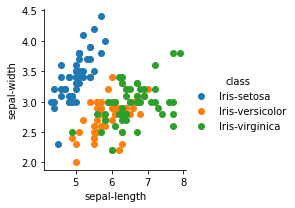

In [7]:

sns.FacetGrid(iris_data, hue = 'class') \
   .map(plt.scatter, 'sepal-length','sepal-width') \
   .add_legend()
plt.show()

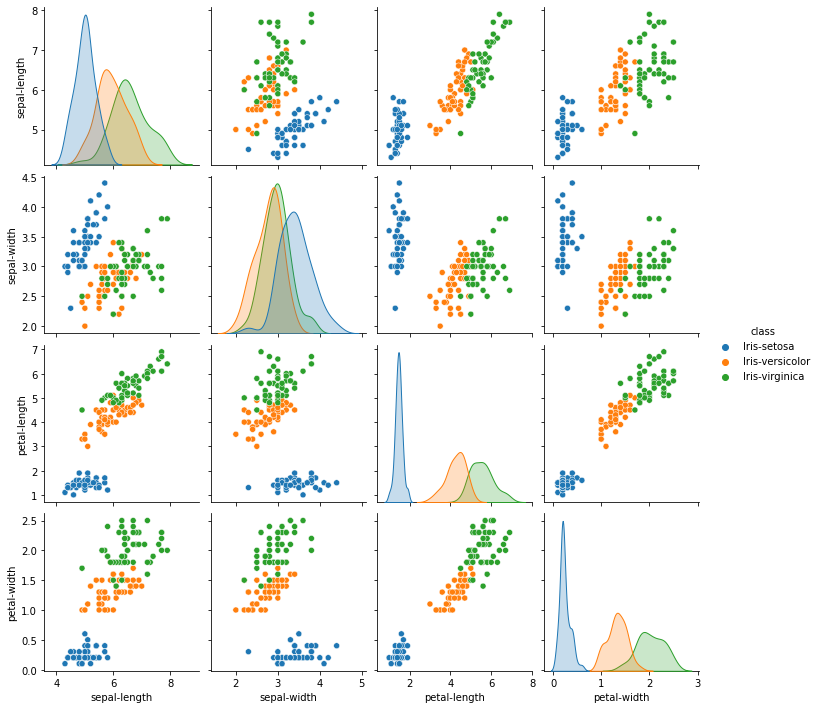

In [8]:
sns.pairplot(iris_data.drop(['id'],axis=1), hue='class')
plt.show()

In [9]:
from sklearn import tree
import graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score

In [10]:
x = iris_data[['sepal-length', 'sepal-width','petal-length', 'petal-width']]
y = iris_data['class']

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)

In [12]:

xt, xv, yt, yv = train_test_split(x_train, y_train, test_size=0.10, random_state=42)

In [13]:
model = DecisionTreeClassifier(criterion='gini',min_samples_split=2)
model.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

[Text(103.01538461538462, 201.90857142857143, 'X[3] <= 0.8\ngini = 0.664\nsamples = 105\nvalue = [31, 37, 37]'),
 Text(77.26153846153846, 170.84571428571428, 'gini = 0.0\nsamples = 31\nvalue = [31, 0, 0]'),
 Text(128.76923076923077, 170.84571428571428, 'X[2] <= 4.75\ngini = 0.5\nsamples = 74\nvalue = [0, 37, 37]'),
 Text(51.50769230769231, 139.78285714285715, 'X[3] <= 1.6\ngini = 0.059\nsamples = 33\nvalue = [0, 32, 1]'),
 Text(25.753846153846155, 108.72, 'gini = 0.0\nsamples = 32\nvalue = [0, 32, 0]'),
 Text(77.26153846153846, 108.72, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(206.03076923076924, 139.78285714285715, 'X[3] <= 1.75\ngini = 0.214\nsamples = 41\nvalue = [0, 5, 36]'),
 Text(128.76923076923077, 108.72, 'X[2] <= 4.95\ngini = 0.5\nsamples = 8\nvalue = [0, 4, 4]'),
 Text(103.01538461538462, 77.65714285714284, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0]'),
 Text(154.52307692307693, 77.65714285714284, 'X[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text

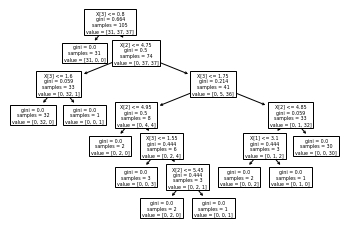

In [14]:
tree.plot_tree(model)

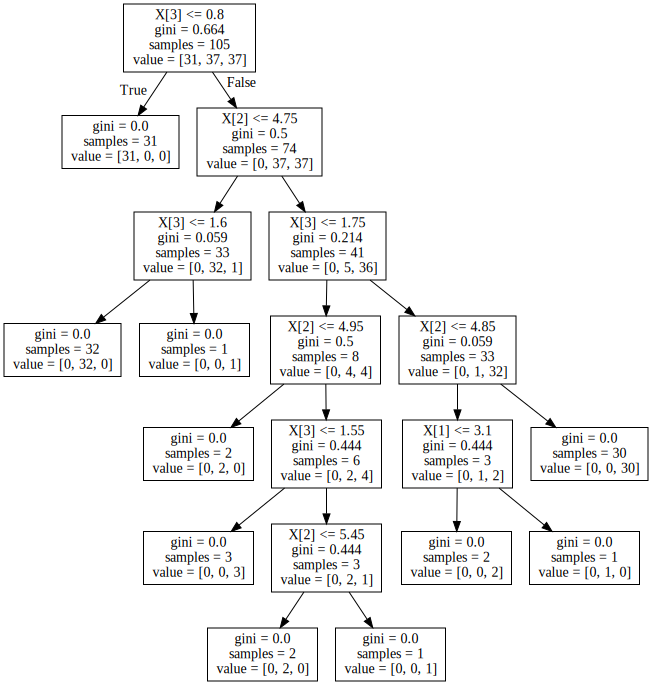

In [15]:

data = tree.export_graphviz(model, out_file=None)
graph = graphviz.Source(data)
graph

In [16]:
print('Accuracy score is:',cross_val_score(model, xt, yt, cv=3, scoring='accuracy').mean())

Accuracy score is: 0.9361559139784946


Check the validation data

In [17]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score
pred = model.predict(xv)
print('Accuracy score for validation test data is:',accuracy_score(yv, pred))
multilabel_confusion_matrix(yv , pred)

Accuracy score for validation test data is: 1.0


array([[[10,  0],
        [ 0,  1]],

       [[ 4,  0],
        [ 0,  7]],

       [[ 8,  0],
        [ 0,  3]]])